In [23]:
import numpy as np
from scipy import stats 
import matplotlib.pyplot as plt
%matplotlib inline
import random
from tqdm import tqdm
import pandas as pd
plt.style.use("ggplot")

In [2]:
stats.rv_continuous

scipy.stats._distn_infrastructure.rv_continuous

In [3]:
stats.rv_discrete

scipy.stats._distn_infrastructure.rv_discrete

## Дискретные распределения

In [4]:
rv_bernoulli=stats.bernoulli(p=0.3)

In [5]:
rv_bernoulli.rvs(14)

array([0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0])

##### Биномиальное распределение

Биномиальное распределение это обобщение распределения Бернулли- только здесь расматривается успех
или неудача в n эксперементах, поэтому для генерации выборки нужно задать два параметра: вероятность успеха, общее кол-во эксперементов

In [6]:
rv_binom=stats.binom(100, p=0.9) #параметры- количество эксперементов и вероятность

In [7]:
rv_binom.rvs(8) #так же можем из этого распределения сгенерить некоторую выборку

array([87, 88, 84, 88, 87, 94, 87, 92])

(array([ 3.,  8.,  6., 12.,  8., 21.,  7.,  4.,  7.,  4.]),
 array([84. , 85.2, 86.4, 87.6, 88.8, 90. , 91.2, 92.4, 93.6, 94.8, 96. ]),
 <a list of 10 Patch objects>)

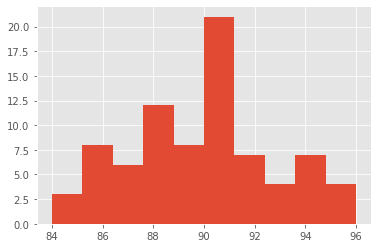

In [8]:
plt.hist(rv_binom.rvs(80), bins=10)

## Неприрывные распределения

In [9]:
a=5
b=10

rv_uniform=stats.uniform(a, b-a)

In [10]:
rv_uniform.cdf(5.5) #находим функцию распределения в данном интервале

0.1

In [11]:
rv_uniform.pdf(2) #анологично можем найти плотность вероятности

0.0

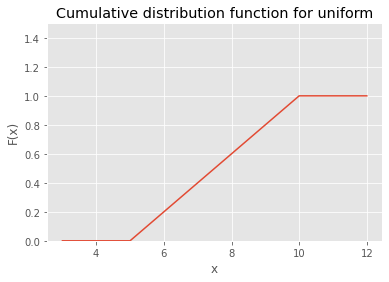

In [12]:
x=np.linspace(a-2, b+2, 100) #строим график функции распределения
cdf=rv_uniform.cdf(x)
plt.plot(x,cdf)

plt.ylabel("F(x)")
plt.xlabel("x")
plt.ylim([0,1.5])
plt.title(u"Cumulative distribution function for uniform");

Text(0.5, 1.0, 'PDF for uniform')

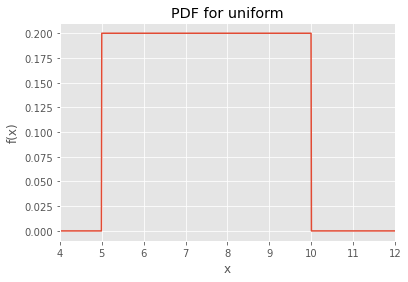

In [13]:
x=np.linspace(a-2, b+2, 1000) #Сторим график плотности вероятности
pdf=rv_uniform.pdf(x)
plt.plot(x,pdf)

plt.ylabel("f(x)")
plt.xlabel("x")
#plt.ylim([0,1])
plt.xlim([4,12]);
plt.title(u"PDF for uniform")

##### Нормальное распределение

In [14]:
mu=2 #Среднее значение
sigma=0.5 #Среднеквадратичное отклонение

rv_norm=stats.norm(loc=mu, scale=sigma)

In [15]:
rv_norm.rvs(17) #Из случайной величины можем сделать сэмпл данных

array([1.42940374, 1.68819792, 2.4363027 , 2.27110205, 1.95923791,
       2.13700797, 1.7519939 , 2.17992004, 1.53402578, 2.36321578,
       1.90331845, 2.18538817, 1.95636561, 1.47881829, 2.34576274,
       2.22979878, 2.73847265])

Text(0.5, 0, 'x')

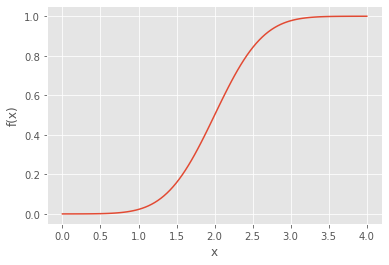

In [16]:
x=np.linspace(0,4,100) #Как для нормальной величины будет выглядеть функция распределения
cdf=rv_norm.cdf(x)
plt.plot(x,cdf)
plt.ylabel("f(x)")
plt.xlabel("x")


Text(0.5, 0, 'x')

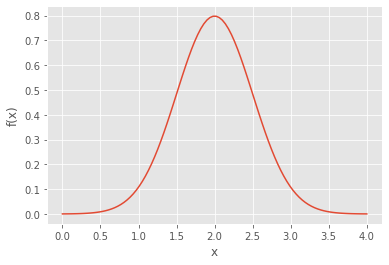

In [17]:
x=np.linspace(0,4,100) #Плотность вероятности в нормальном распределнии
pdf=rv_norm.pdf(x)
plt.plot(x,pdf)

plt.ylabel("f(x)")
plt.xlabel("x")

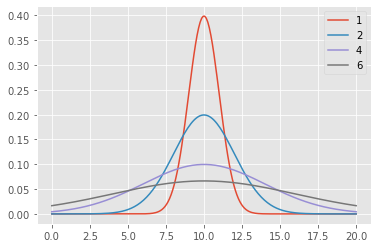

In [18]:
means=[1,5,10]
mu=10
sigmas=[1,2,4,6]
for sigma in sigmas:
    rv_norm=stats.norm(loc=mu, scale=sigma)
    x=np.linspace(0,20,200)
    cdf=rv_norm.pdf(x)
    plt.plot(x,cdf, label=sigma)
plt.legend();

In [19]:
mean,var,skew=rv_norm.stats(moments="mvs") #с помощью статс, можем посчитать среднее, дисперсию и параметр смещенности

In [20]:
skew

array(0.)

### Доверительный интервал

##### Доверительный интервал это показатель точности измерений. Его применяют как для оценки среднего, так и для оценки дисперсии. Он также отражает, насколько величина, подсчитанная по выборке, отражает истинное значение по некоторой генеральной совокупности

In [26]:
population=stats.norm.rvs(loc=2, scale=5, size=100000) #Давайте зафиксируем некоторое распределение

In [27]:
sample_size=100  #Сделаем из данного распределения сэмпл
sample=np.random.choice(a=population, size=sample_size) #в параметрах указали исходное распределение и какой размер
                                                        #выборки хотим получить.

In [30]:
sample_mean=sample.mean()  #Найдем выборочное среднее и дисперсию по генеральной совокупности 
st_dev=population.std()

In [33]:
z_value=stats.norm.ppf(q=0.975) #найдем z-value соответствующей 95%
print("z-value:", z_value)

z-value: 1.959963984540054


In [35]:
stats.norm.ppf(q=0.025) #Для левой границы в силу симметрии нормального распределения

-1.9599639845400545

##### Найдем сам интервал

In [38]:
interval=z_value*(st_dev/np.sqrt(sample_size))
conf_inv=(sample_mean-interval, sample_mean+interval)

print("Confidence interval:", conf_inv)

Confidence interval: (0.6234275082004461, 2.582059714379807)


#### Неизвестная дисперсия с помощью распределения Стьюдента

Алгоритм поиска доверительного интервала не отличается, только z-value заменяется на t-value:

In [39]:
def compute_ci_t(sample, alpha=0.95):
    n=sample.shape[0]
    mu,se=np.mean(sample), stats.sem(sample)
    bound=se*stats.t.ppf((1+alpha)/2., n-1)
    
    return mu-bound, mu+bound

In [40]:
sample=np.random.choice(a=population,size=30)
ci_t=compute_ci_t(sample,alpha=0.95)
print("conf interval with t test for 2000 sample size: ", ci_t)

conf interval with t test for 2000 sample size:  (0.9817574970819829, 4.568590626660682)


#### Что делать если неизвестно распределение

В этом случае нам поможет ЦПТ. Давайте вспомним, что распределение средних — это есть нормальное распределение. А для нормального распределения мы уже знаем, как вычислять доверительный интервал.